In [10]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Задача 2.1.11

In [12]:
def f(x):
    tgx = np.tan(x)
    return tgx ** 2 - 28/9 * tgx + 1/3

def g(x):
    tgx = np.tan(x)
    return tgx ** 2 - 6 * tgx + 9

## f(x)

### Аналитически:

$$[tg(x) = u]$$

$$u^2 - \frac{28}{9}u+1/3=0$$

Теорема Виета:

$$u_1 + u_2 = \frac{28}{9},\ \ u_1 u_2 = 1/3 $$

Получим:

$$ u_1 = 3,\ \ u_2 = 1/9 $$

$$ tg(x_1) = 3,\ \ x_1 = arctg(3) + \pi n $$

$$ tg(x_2) = 1/9,\ \ x_2 = arctg(1/9) + \pi n $$

In [7]:
np.arctan(3)

1.2490457723982544

In [8]:
np.arctan(1/9)

0.11065722117389563

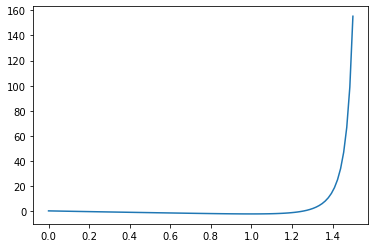

In [18]:
x = np.linspace(0, 1.5, 100)
plt.plot(x, f(x));

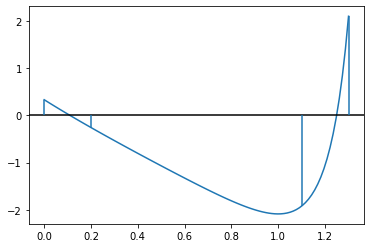

In [31]:
x = np.linspace(0, 1.3, 100)
plt.plot(x, f(x));
plt.axhline(0, color='k');
x_gran = [0., 0.2, 1.1, 1.3]
plt.vlines(x_gran, f(x_gran), 0*len(x_gran));

$$ x_1 \in [0, 0.2]$$
$$ x_2 \in [1.1, 1.3]$$

In [52]:
def bisec(f, a, b, eps):
    a_n = a
    b_n = b
    k = 0
    xn=0
    while abs(b_n - a_n) > 2*eps or k < 1000:
        xn = (a_n + b_n) / 2
        fa = f(a)
        fb = f(b)
        fxn = f(xn)
        if fa * fxn < 0:
            b_n = xn
        else:
            a_n = xn
        k += 1
    return xn, k

In [41]:
bisec(f, 0, 0.2, 1e-10)

(0.1106572212651372, 30)

In [44]:
bisec(f, 1.1, 1.3, 1e-10)

(1.24904577229172, 30)

In [43]:
root_scalar(f, bracket=(0,0.2), xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.11065722117389565

In [46]:
root_scalar(f, bracket=(1.1,1.3), xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 1.2490457723982544

## g(x)

### Аналитически:

$$[tg(x) = u]$$

$$u^2 - 6u+9=0$$

Полный квадрат выделяем.

Получим:

$$ u_1 = u_2 = 3 $$

$$ x_1 = x_2 = arctg(3) + \pi n $$

In [7]:
np.arctan(3)

1.2490457723982544

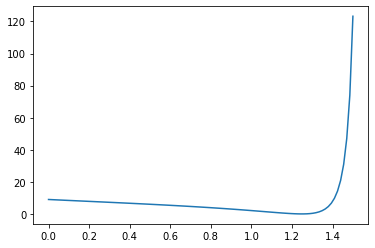

In [47]:
x = np.linspace(0, 1.5, 100)
plt.plot(x, g(x));

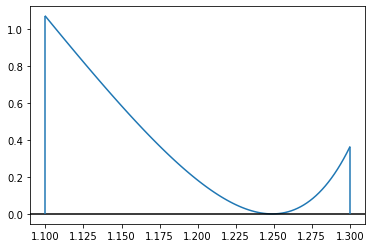

In [51]:
x = np.linspace(1.1, 1.3, 100)
plt.plot(x, g(x));
plt.axhline(0, color='k');
x_gran = [1.1, 1.3]
plt.vlines(x_gran, g(x_gran), 0*len(x_gran));

$$ x_1 = x_2 \in [1.1, 1.3]$$

In [53]:
bisec(g, 1.1, 1.3, 1e-10)

(1.2999999999999998, 1000)

In [54]:
root_scalar(g, bracket=(1.1,1.3), xtol=1e-10)

ValueError: f(a) and f(b) must have different signs

## Вывод
Метод бисекции, ровно как в другие методы поиска корней уравнения, требующие лишь локализации, не способны проводить вычисления, если функция на краях локализованной зоны не имеет значения разных знаков, что видно во втором случае.

Заметно, что метод бисекции при успешных для его применения условиях находит корень с постоянной скоростью, уменьшая погрешность на каждом шаге в два раза. Рез-ы показывают, что метод уступает реализациям поиска корня в пакете Scipy.

# Задача 2.6.2

In [75]:
def f(x):
    return np.sqrt(2-np.power(x,2)) - np.exp(x)

## Локализация

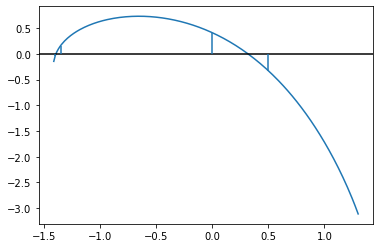

In [80]:
x = np.linspace(-np.sqrt(1.99), 1.3, 200)
plt.plot(x, f(x));
plt.axhline(0, color='k');
x_gran = [-1.4, -1.35, 0., 0.5]
plt.vlines(x_gran, f(x_gran), 0*len(x_gran));

$$ x_1 \in [-1.4, -1.35]$$
$$ x_1 \in [0., 0.5]$$

## Производная

In [78]:
def f_der(x):
    return -x/np.sqrt(2-np.power(x,2)) - np.exp(x)

## Ньютон

In [86]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    i = 0
    x_0 = x0
    while i < maxiter:
        x_1 = x_0 - f(x_0) / fder(x_0)
        if abs(x_1 - x_0) < eps:
            break
        i += 1
        x_0 = x_1
    return x_1, i

In [92]:
print(f'eps=1e-5: {newton_iteration(f, f_der, -1.35, 1e-5)}')
print(f'eps=1e-12: {newton_iteration(f, f_der, -1.35, 1e-12)}')

eps=1e-5: (-1.392204894033541, 4)
eps=1e-12: (-1.3922048940333005, 5)


In [93]:
print(f'eps=1e-5: {newton_iteration(f, f_der, 0.25, 1e-5)}')
print(f'eps=1e-12: {newton_iteration(f, f_der, 0.25, 1e-12)}')

eps=1e-5: (0.32025238556103663, 2)
eps=1e-12: (0.32025238551809854, 4)


## Метод Ложного положения

In [114]:
def hord(f, fder, a, b, eps=1e-5, maxiter=100):
    i = 0
    x0 = a
    x1 = b
    while i < maxiter:
        x2 = x1 - (x1 - x0) * f(x1) / (f(x1) - f(x0))
        if abs(x2 - x1) < eps:
            break
        i += 1
        x0 = x1
        x1 = x2
    return x2, i

In [116]:
print(f'eps=1e-5: {hord(f, f_der, -1.4, -1.35, 1e-5)}')
print(f'eps=1e-12: {hord(f, f_der, -1.4, -1.35, 1e-12)}')

eps=1e-5: (-1.3922048945537802, 4)
eps=1e-12: (-1.3922048940333005, 6)


In [119]:
print(f'eps=1e-5: {hord(f, f_der, 0, 0.5, 1e-5)}')
print(f'eps=1e-12: {hord(f, f_der, 0, 0.5, 1e-12)}')

eps=1e-5: (0.32025238548610174, 4)
eps=1e-12: (0.3202523855180986, 6)


## Истинный ответ

In [105]:
root_scalar(f, fprime=f_der, x0=0.25, xtol=1e-5)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 3
           root: 0.32025238556103663

In [117]:
root_scalar(f, fprime=f_der, x0=0.25, xtol=1e-12)

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 4
           root: 0.32025238551809854

In [106]:
root_scalar(f, fprime=f_der, x0=-1.36, xtol=1e-5)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: -1.3922048940333005

In [118]:
root_scalar(f, fprime=f_der, x0=-1.36, xtol=1e-12)

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -1.3922048940333005

## Вывод 

Метод ложного положения оказался незначительно медленнее метода Ньютона.

# Задача 2.9.4